In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme(style='whitegrid', font_scale=1.5)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [36]:
data = pd.read_csv('2022.csv', encoding='CP949')

In [37]:
data.head()

,수도권여부,가구주_성별코드,가구원수,가구주_교육정도_학력코드,가구주_직업대분류코드,가구주_만연령,자산_금융자산_저축금액,자산_실물자산_부동산금액,부채_금융부채_담보대출금액,부채_금융부채_신용대출금액,경상소득(보완),지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_비소비지출_세금(보완)
0,G1,1,1,1,NaN,64,1,0,0,0,1379,660,312,0,0
1,G1,1,1,1,NaN,74,2400,19300,0,0,1841,450,190,0,23
2,G1,1,1,1,NaN,81,200,0,0,0,954,500,300,0,0
3,G1,1,1,1,NaN,82,850,0,0,0,930,120,160,0,1
4,G1,1,1,1,NaN,83,10500,36000,0,0,1157,360,150,0,42


In [38]:
data.info() # 범주형 변환필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   수도권여부               17954 non-null  object
 1   가구주_성별코드            17954 non-null  int64 
 2   가구원수                17954 non-null  int64 
 3   가구주_교육정도_학력코드       17954 non-null  int64 
 4   가구주_직업대분류코드         13231 non-null  object
 5   가구주_만연령             17954 non-null  int64 
 6   자산_금융자산_저축금액        17954 non-null  int64 
 7   자산_실물자산_부동산금액       17954 non-null  int64 
 8   부채_금융부채_담보대출금액      17954 non-null  int64 
 9   부채_금융부채_신용대출금액      17954 non-null  int64 
 10  경상소득(보완)            17954 non-null  int64 
 11  지출_소비지출_식료품(외식비포함)  17954 non-null  int64 
 12  지출_소비지출_주거비         17954 non-null  int64 
 13  지출_소비지출_교육비(보육료포함)  17954 non-null  int64 
 14  지출_비소비지출_세금(보완)     17954 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 2.1+ MB


In [39]:
data.columns

Index(['수도권여부', '가구주_성별코드', '가구원수', '가구주_교육정도_학력코드', '가구주_직업대분류코드', '가구주_만연령',
       '자산_금융자산_저축금액', '자산_실물자산_부동산금액', '부채_금융부채_담보대출금액', '부채_금융부채_신용대출금액',
       '경상소득(보완)', '지출_소비지출_식료품(외식비포함)', '지출_소비지출_주거비', '지출_소비지출_교육비(보육료포함)',
       '지출_비소비지출_세금(보완)'],
      dtype='object')

In [44]:
data.rename(columns={ '가구주_성별코드':'성별', '가구주_교육정도_학력코드':'학력', '가구주_직업대분류코드':'직업', '가구주_만연령':'연령',
       '자산_금융자산_저축금액':'저축', '자산_실물자산_부동산금액':'부동산', '부채_금융부채_담보대출금액':'담보대출', '부채_금융부채_신용대출금액':'신용대출',
       '경상소득(보완)':'소득', '지출_소비지출_식료품(외식비포함)':'식료지출', '지출_소비지출_주거비':'주거지출', '지출_소비지출_교육비(보육료포함)':'교육지출',
       '지출_비소비지출_세금(보완)':'세금'},inplace=True)

In [45]:
data['직업'].fillna('기타',inplace=True)

In [46]:
data['성별']=data['성별'].astype('category')
data['수도권여부']=data['수도권여부'].astype('category')
data['학력']=data['학력'].astype('category')
data['직업']=data['직업'].astype('category')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   수도권여부   17954 non-null  category
 1   성별      17954 non-null  category
 2   가구원수    17954 non-null  int64   
 3   학력      17954 non-null  category
 4   직업      17954 non-null  category
 5   연령      17954 non-null  int64   
 6   저축      17954 non-null  int64   
 7   부동산     17954 non-null  int64   
 8   담보대출    17954 non-null  int64   
 9   신용대출    17954 non-null  int64   
 10  소득      17954 non-null  int64   
 11  식료지출    17954 non-null  int64   
 12  주거지출    17954 non-null  int64   
 13  교육지출    17954 non-null  int64   
 14  세금      17954 non-null  int64   
dtypes: category(4), int64(11)
memory usage: 1.6 MB


In [48]:
int_columns = data.select_dtypes(include=['int64']).columns

scaler = StandardScaler()

# StandardScaler를 적용할 열이 존재하는지 확인
if not int_columns.empty:
    # int 열에 대해서만 스케일 조정
    data[int_columns] = scaler.fit_transform(data[int_columns])

# 업데이트된 데이터프레임 확인
data.head()

,수도권여부,성별,가구원수,학력,직업,연령,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금
0,G1,1,-1.120841,1,기타,0.364231,-0.428647,-0.538143,-0.325902,-0.252578,-0.749248,-0.293596,-0.053373,-0.407146,-0.256492
1,G1,1,-1.120841,1,기타,1.021987,-0.302715,-0.261454,-0.325902,-0.252578,-0.670925,-0.655862,-0.481841,-0.407146,-0.239660
2,G1,1,-1.120841,1,기타,1.482415,-0.418201,-0.538143,-0.325902,-0.252578,-0.821298,-0.569608,-0.095517,-0.407146,-0.256492
3,G1,1,-1.120841,1,기타,1.548191,-0.384080,-0.538143,-0.325902,-0.252578,-0.825366,-1.225136,-0.587202,-0.407146,-0.255760
4,G1,1,-1.120841,1,기타,1.613966,0.122483,-0.022039,-0.325902,-0.252578,-0.786883,-0.811118,-0.622322,-0.407146,-0.225755


In [49]:
data.columns

Index(['수도권여부', '성별', '가구원수', '학력', '직업', '연령', '저축', '부동산', '담보대출', '신용대출',
       '소득', '식료지출', '주거지출', '교육지출', '세금'],
      dtype='object')

In [50]:
data['성별']

0        1
1        1
2        1
3        1
4        1
        ..
17949    2
17950    2
17951    2
17952    2
17953    2
Name: 성별, Length: 17954, dtype: category
Categories (2, int64): [1, 2]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   수도권여부   17954 non-null  category
 1   성별      17954 non-null  category
 2   가구원수    17954 non-null  float64 
 3   학력      17954 non-null  category
 4   직업      17954 non-null  category
 5   연령      17954 non-null  float64 
 6   저축      17954 non-null  float64 
 7   부동산     17954 non-null  float64 
 8   담보대출    17954 non-null  float64 
 9   신용대출    17954 non-null  float64 
 10  소득      17954 non-null  float64 
 11  식료지출    17954 non-null  float64 
 12  주거지출    17954 non-null  float64 
 13  교육지출    17954 non-null  float64 
 14  세금      17954 non-null  float64 
dtypes: category(4), float64(11)
memory usage: 1.6 MB


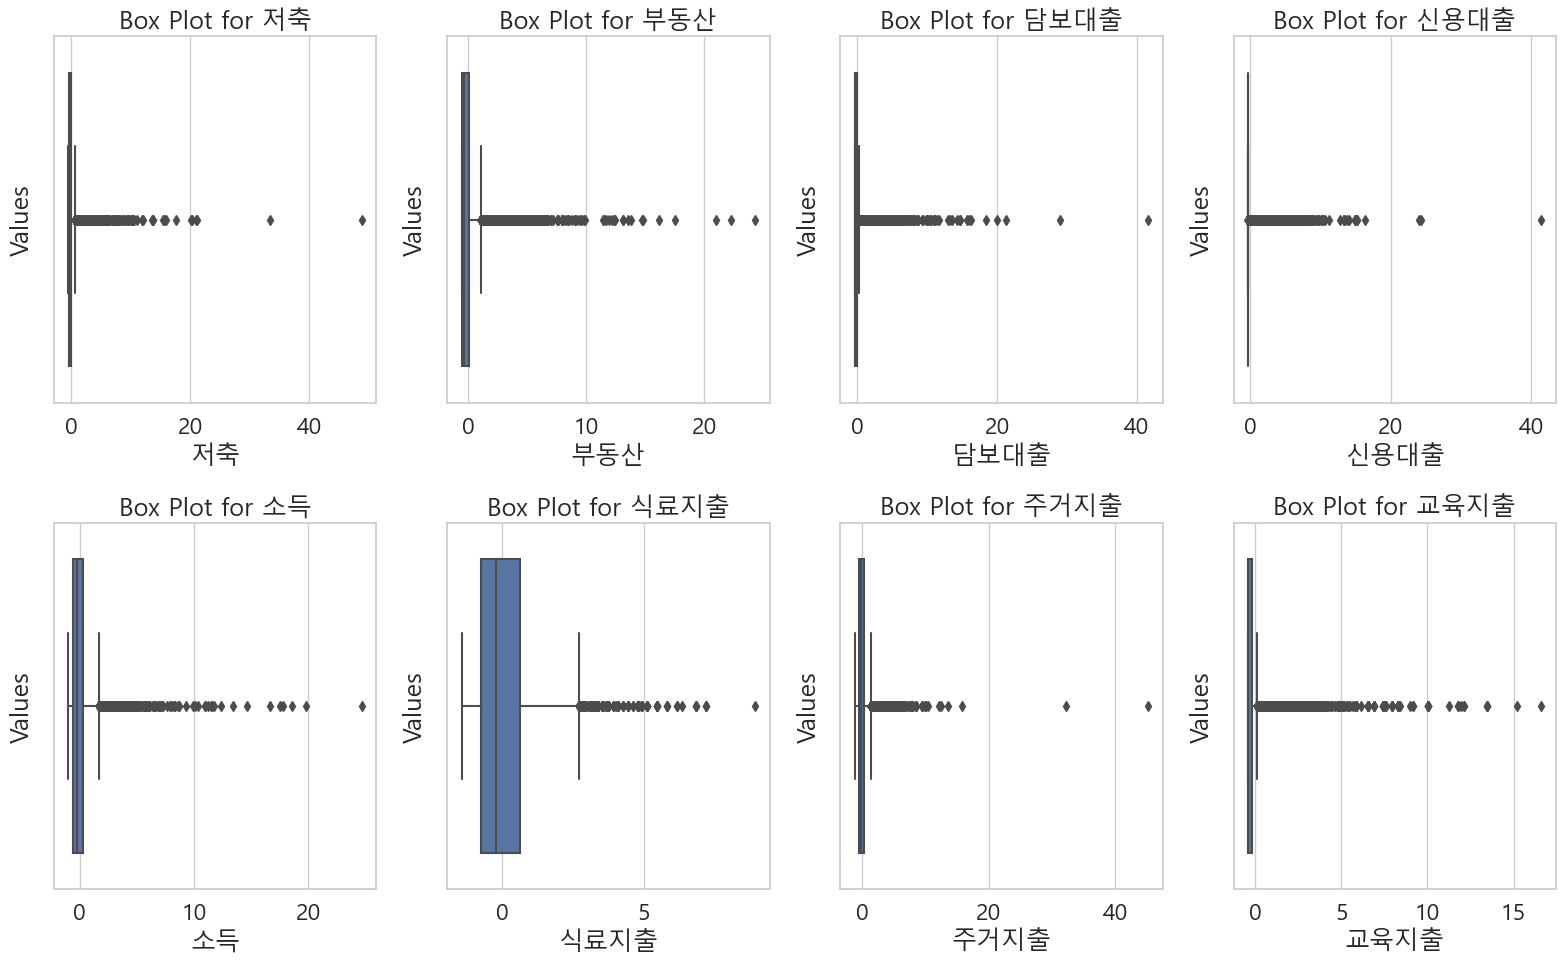

In [52]:
a = data['저축']
b = data['부동산']
c = data['담보대출']
d = data['신용대출']
e = data['소득']
f = data['식료지출']
g = data['주거지출']
h = data['교육지출']
i = data['세금']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
variables = ['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']
data_list = [a,b, c, d, e, f, g, h, i]

for ax, variable, values in zip(axes.flatten(), variables, data_list):
    sns.boxplot(x=values, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Values')
    ax.set_title(f'Box Plot for {variable}')

plt.tight_layout()
plt.savefig('data')

In [53]:
data_int = data[['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']]

In [54]:
data_int.head()

,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금
0,-0.428647,-0.538143,-0.325902,-0.252578,-0.749248,-0.293596,-0.053373,-0.407146,-0.256492
1,-0.302715,-0.261454,-0.325902,-0.252578,-0.670925,-0.655862,-0.481841,-0.407146,-0.239660
2,-0.418201,-0.538143,-0.325902,-0.252578,-0.821298,-0.569608,-0.095517,-0.407146,-0.256492
3,-0.384080,-0.538143,-0.325902,-0.252578,-0.825366,-1.225136,-0.587202,-0.407146,-0.255760
4,0.122483,-0.022039,-0.325902,-0.252578,-0.786883,-0.811118,-0.622322,-0.407146,-0.225755


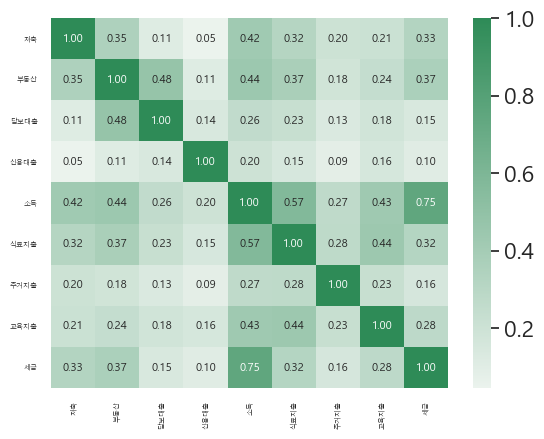

In [55]:
cmap = sns.light_palette("seagreen", as_cmap = True)  
heatmap = sns.heatmap(data_int.corr(), annot=True,annot_kws={'size': 8},fmt='.2f', cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=5)
plt.savefig("data_linear")

<function matplotlib.pyplot.show(close=None, block=None)>

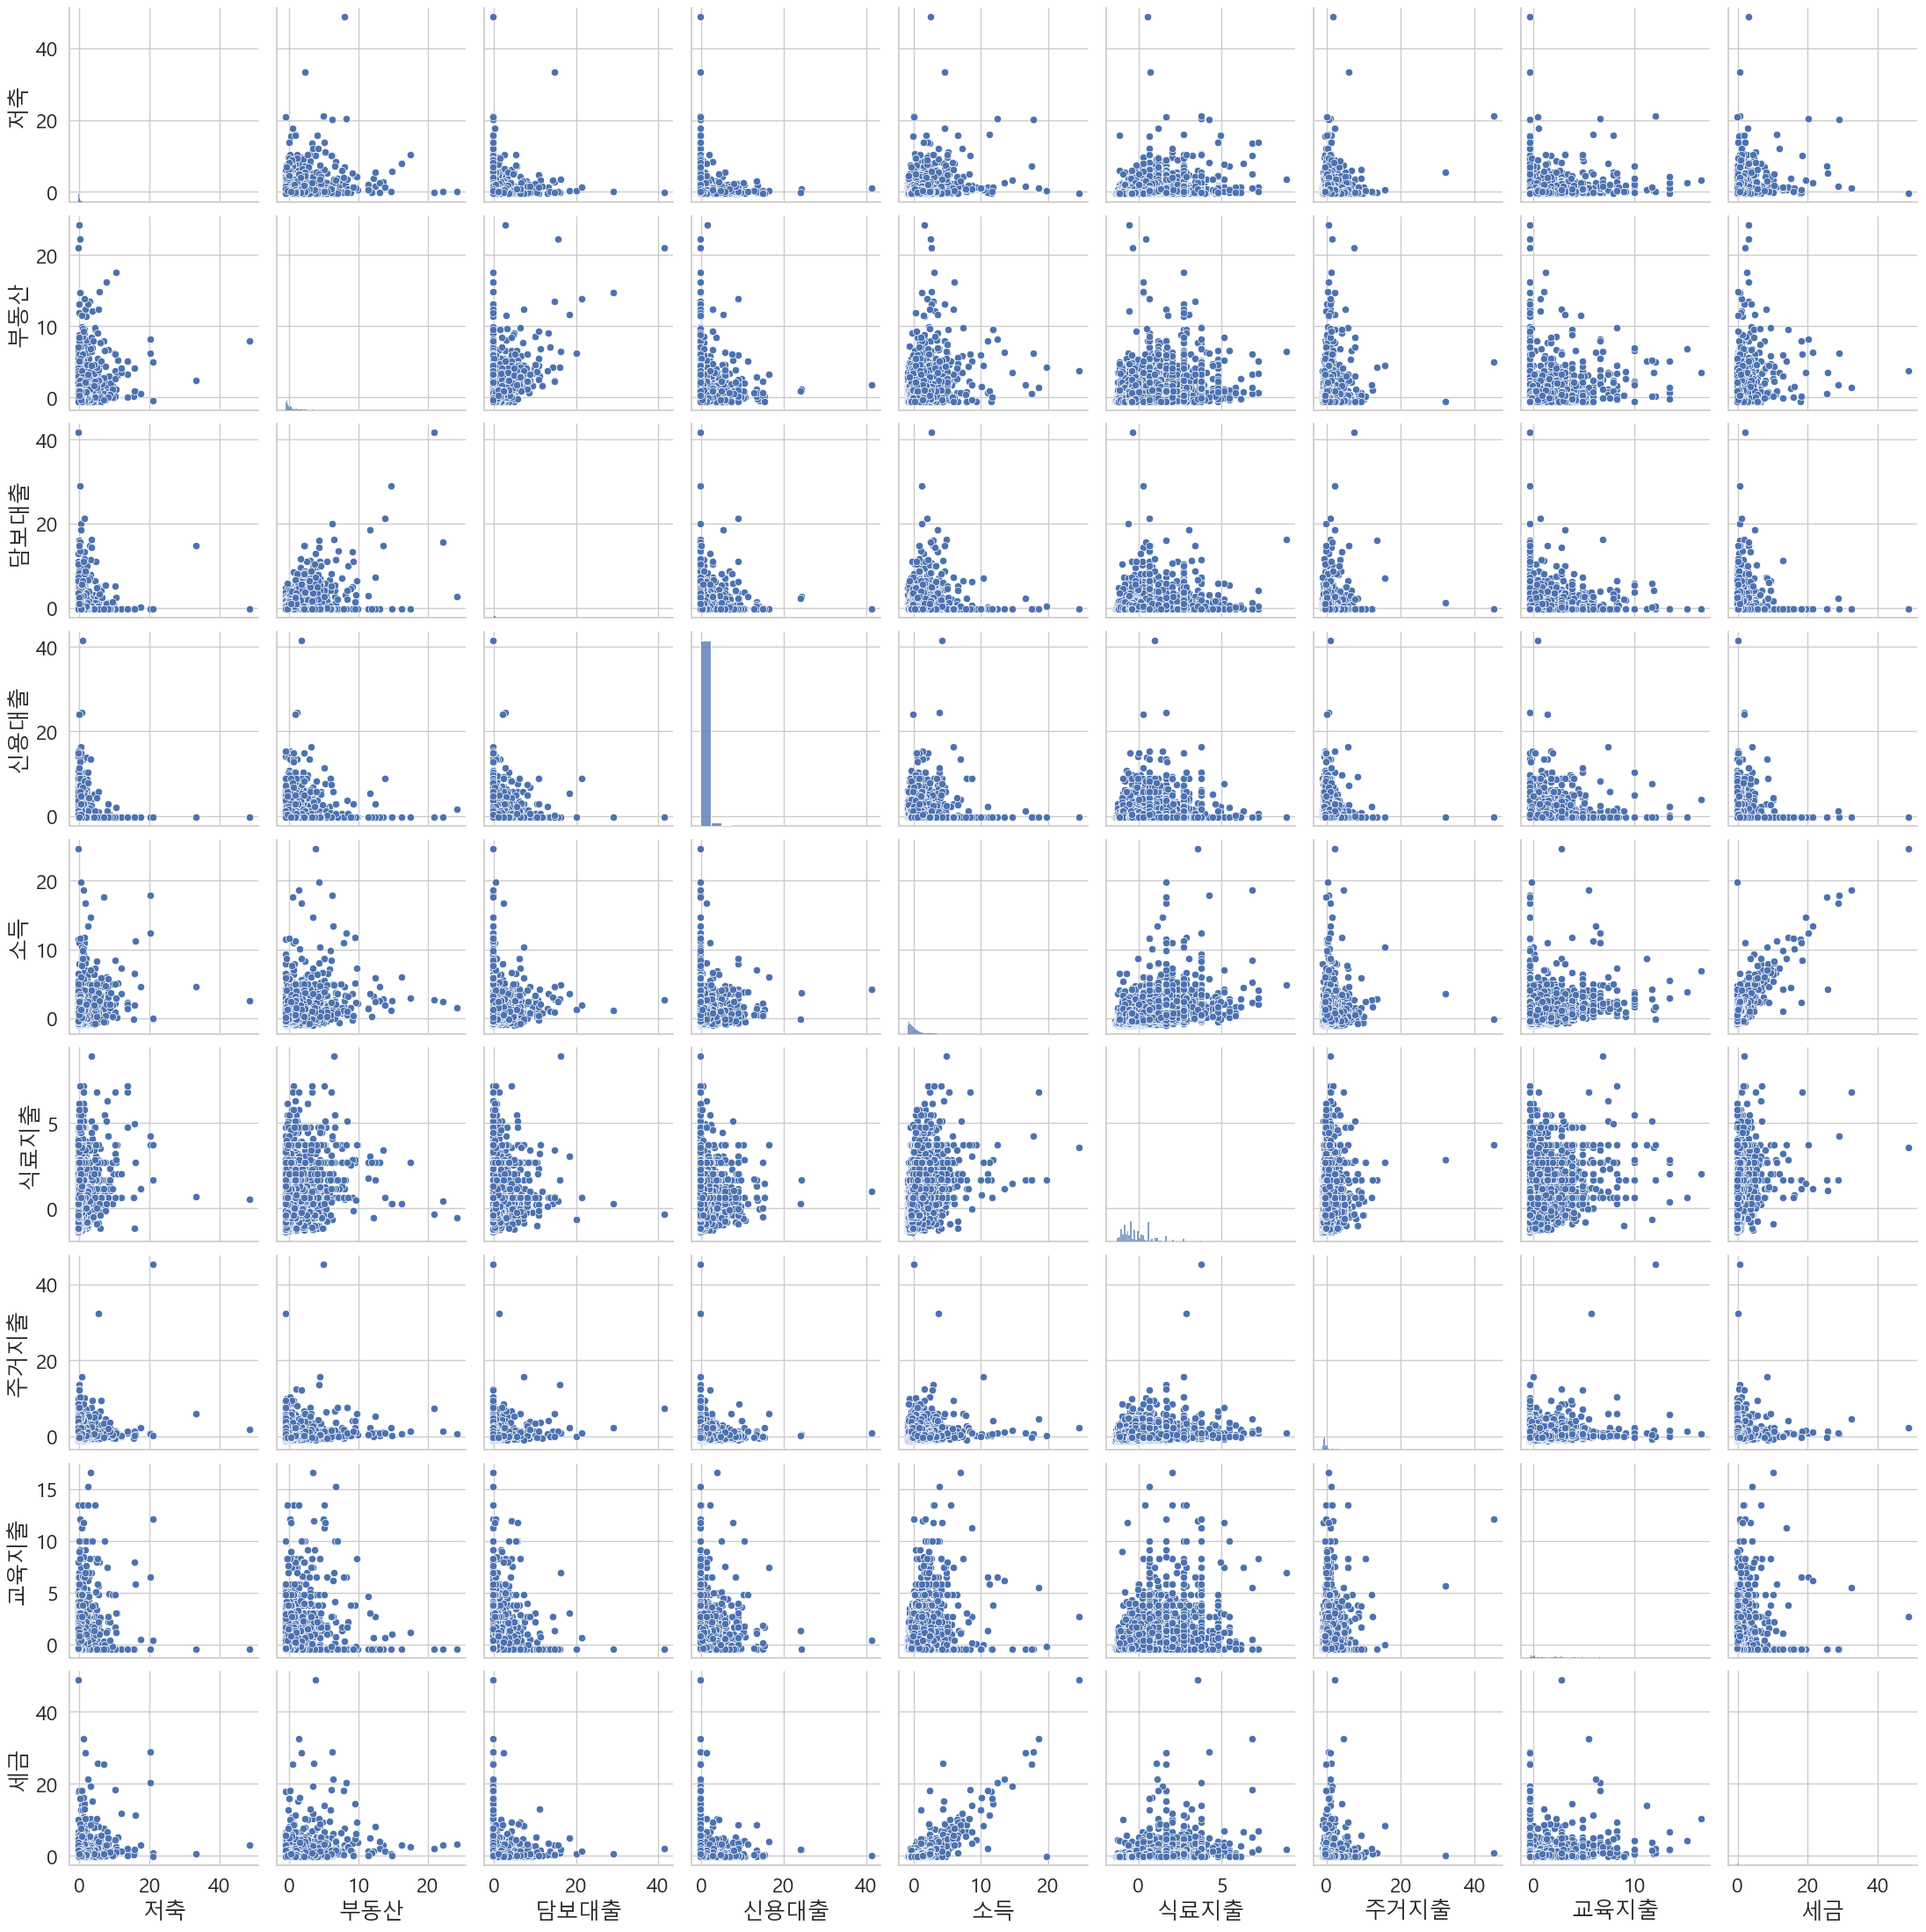

In [56]:
sns.pairplot(data_int)
plt.show

In [91]:
model1 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data = data).fit()
model2 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + C(수도권여부)', data = data).fit()
model3 = smf.ols('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업', data = data).fit()
model4 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + C(직업) + C(수도권여부) + C(학력, Treatment(reference=6))', data=data).fit()

In [74]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4769.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:31:50   Log-Likelihood:                -13203.
No. Observations:               17954   AIC:                         2.643e+04
Df Residuals:                   17942   BIC:                         2.652e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0257      0.005      5.616      0.000       0.017       0.035
성별[T.2]       -0.0919      0.009     -9.873      0.000      -0.110      -0.074
가구원수           0.1869      0.005     35.428      0.000       0.177       0.197
연령            -0.0620      0.004    -14.791      0.000      -0.070      -0.054
저축             0.1067      0.004     25.144      0.000       0.098       0.115
부동산            0.0537      0.005     10.870      0.000       0.044       0.063
담보대출           0.0398      0.004      9.074      0.000       0.031       0.048
신용대출           0.0515      0.004     13.293      0.000       0.044       0.059
식료지출           0.1553      0.005     29.744      0.000       0.145       0.166
주거지출           0.0296      0.004      7.370      0.000       0.022       0.037
교육지출           0.0212      0.005      4.576      0.000       0.012       0.030
세금             0.5805      0.004    135.349      0.000       0.572       0.589
==============================================================================
Omnibus:                    15998.656   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17656785.551
Skew:                           3.120   Prob(JB):                         0.00
Kurtosis:                     156.505   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4376.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:31:51   Log-Likelihood:                -13196.
No. Observations:               17954   AIC:                         2.642e+04
Df Residuals:                   17941   BIC:                         2.652e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0035      0.007      0.473      0.636      -0.011       0.018
성별[T.2]           -0.0907      0.009     -9.733      0.000      -0.109      -0.072
C(수도권여부)[T.G2]     0.0323      0.008      3.877      0.000       0.016       0.049
가구원수               0.1857      0.005     35.138      0.000       0.175       0.196
연령                -0.0634      0.004    -15.077      0.000      -0.072      -0.055
저축                 0.1059      0.004     24.914      0.000       0.098       0.114
부동산                0.0566      0.005     11.325      0.000       0.047       0.066
담보대출               0.0392      0.004      8.928      0.000       0.031       0.048
신용대출               0.0515      0.004     13.290      0.000       0.044       0.059
식료지출               0.1571      0.005     29.984      0.000       0.147       0.167
주거지출               0.0306      0.004      7.612      0.000       0.023       0.038
교육지출               0.0212      0.005      4.571      0.000       0.012       0.030
세금                 0.5805      0.004    135.408      0.000       0.572       0.589
==============================================================================
Omnibus:                    15973.515   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17574449.687
Skew:                           3.112   Prob(JB):                         0.00
Kurtosis:                     156.147   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2635.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:31:51   Log-Likelihood:                -12840.
No. Observations:               17954   AIC:                         2.572e+04
Df Residuals:                   17932   BIC:                         2.589e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2263      0.028      7.953      0.000       0.171       0.282
성별[T.2]       -0.0739      0.009     -7.802      0.000      -0.093      -0.055
직업[T.2]       -0.0191      0.030     -0.635      0.526      -0.078       0.040
직업[T.3]       -0.0508      0.030     -1.677      0.094      -0.110       0.009
직업[T.4]       -0.1928      0.032     -6.029      0.000      -0.256      -0.130
직업[T.5]       -0.1567      0.032     -4.932      0.000      -0.219      -0.094
직업[T.6]       -0.2104      0.032     -6.509      0.000      -0.274      -0.147
직업[T.7]       -0.1712      0.031     -5.487      0.000      -0.232      -0.110
직업[T.8]       -0.1246      0.031     -4.070      0.000      -0.185      -0.065
직업[T.9]       -0.2673      0.031     -8.668      0.000      -0.328      -0.207
직업[T.A]        0.0839      0.107      0.784      0.433      -0.126       0.294
직업[T.기타]      -0.3894      0.030    -12.902      0.000      -0.449      -0.330
가구원수           0.1796      0.005     34.457      0.000       0.169       0.190
연령             0.0033      0.005      0.663      0.507      -0.006       0.013
저축             0.1045      0.004     25.062      0.000       0.096       0.113
부동산            0.0528      0.005     10.861      0.000       0.043       0.062
담보대출           0.0344      0.004      7.974      0.000       0.026       0.043
신용대출           0.0492      0.004     12.930      0.000       0.042       0.057
식료지출           0.1402      0.005     27.002      0.000       0.130       0.150
주거지출           0.0279      0.004      7.083      0.000       0.020       0.036
교육지출           0.0118      0.005      2.569      0.010       0.003       0.021
세금             0.5715      0.004    134.995      0.000       0.563       0.580
==============================================================================
Omnibus:                    16551.966   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20031650.419
Skew:                           3.309   Prob(JB):                         0.00
Kurtosis:                     166.504   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1928.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:56:13   Log-Likelihood:                -12766.
No. Observations:               17954   AIC:                         2.559e+04
Df Residuals:                   17924   BIC:                         2.583e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.2361      0.029      8.018      0.000       0.178       0.294
성별[T.2]                               -0.0539      0.010     -5.515      0.000      -0.073      -0.035
C(직업)[T.2]                            -0.0508      0.030     -1.684      0.092      -0.110       0.008
C(직업)[T.3]                            -0.0539      0.030     -1.785      0.074      -0.113       0.005
C(직업)[T.4]                            -0.1809      0.032     -5.659      0.000      -0.244      -0.118
C(직업)[T.5]                            -0.1432      0.032     -4.517      0.000      -0.205      -0.081
C(직업)[T.6]                            -0.1882      0.032     -5.796      0.000      -0.252      -0.125
C(직업)[T.7]                            -0.1475      0.031     -4.720      0.000      -0.209      -0.086
C(직업)[T.8]                            -0.1013      0.031     -3.296      0.001      -0.162      -0.041
C(직업)[T.9]                            -0.2429      0.031     -7.857      0.000      -0.303      -0.182
C(직업)[T.A]                             0.0764      0.107      0.716      0.474      -0.133       0.285
C(직업)[T.기타]                           -0.3750      0.030    -12.449      0.000      -0.434      -0.316
C(수도권여부)[T.G2]                         0.0301      0.008      3.654      0.000       0.014       0.046
C(학력, Treatment(reference=6))[T.1]    -0.1295      0.022     -5.823      0.000      -0.173      -0.086
C(학력, Treatment(reference=6))[T.2]    -0.1246      0.016     -7.656      0.000      -0.157      -0.093
C(학력, Treatment(reference=6))[T.3]    -0.0759      0.016     -4.857      0.000      -0.106      -0.045
C(학력, Treatment(reference=6))[T.4]    -0.0526      0.011     -4.590      0.000      -0.075      -0.030
C(학력, Treatment(reference=6))[T.5]    -0.0438      0.014     -3.205      0.001      -0.071      -0.017
C(학력, Treatment(reference=6))[T.7]     0.0905      0.020      4.495      0.000       0.051       0.130
C(학력, Treatment(reference=6))[T.8]     0.1953      0.033      5.916      0.000       0.131       0.260
가구원수                                   0.1791      0.005     34.352      0.000       0.169       0.189
연령                                     0.0195      0.006      3.499      0.000       0.009       0.030
저축                                     0.1000      0.004     23.964      0.000       0.092       0.108
부동산                                    0.0477      0.005      9.618      0.000       0.038       0.057
담보대출                                   0.0360      0.004      8.366      0.000       0.028       0.044
신용대출                                   0.0483      0.004     12.728      0.000       0.041       0.056
식료지출                                   0.1357      0.005     25.997      0.000       0.125      

<AxesSubplot:>

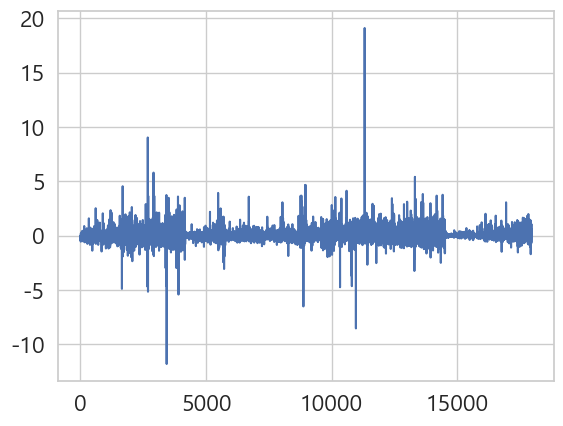

In [88]:
model1.resid.plot(label = "full model")


In [24]:
int_columns

Index(['성별', '가구원수', '학력', '연령', '저축', '부동산', '담보대출', '신용대출', '소득', '식료지출',
       '주거지출', '교육지출', '세금'],
      dtype='object')

### 다중공선성

In [68]:
model1 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data = data).fit()
import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 1.4782223131188854
VIF of 성별[T.2] : 1.2304350818535463
VIF of 가구원수 : 1.9600694014304603
VIF of 연령 : 1.2355351306688902
VIF of 저축 : 1.2688584038446993
VIF of 부동산 : 1.7210745987642786
VIF of 담보대출 : 1.3565938351833293
VIF of 신용대출 : 1.0586885174629068
VIF of 식료지출 : 1.9189512527937496
VIF of 주거지출 : 1.1347397094096083
VIF of 교육지출 : 1.5124169592613583
VIF of 세금 : 1.2949132855170986


In [84]:
model4 = smf.ols('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + 학력', data = data)
import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + C(학력', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))C


VIF of Intercept : 89.87305521146823
VIF of 성별[T.2] : 1.4226738111024482
VIF of 직업[T.2] : 6.708083839942063
VIF of 직업[T.3] : 6.201924108007746
VIF of 직업[T.4] : 4.683874495612613
VIF of 직업[T.5] : 4.482022966332495
VIF of 직업[T.6] : 5.092073469327978
VIF of 직업[T.7] : 5.344201670612254
VIF of 직업[T.8] : 6.399369250618615
VIF of 직업[T.9] : 7.37586727748963
VIF of 직업[T.A] : 1.0750654729051392
VIF of 직업[T.기타] : 12.988670848172275
VIF of 수도권여부[T.G2] : 1.0915565167414567
VIF of 학력[T.2] : 3.323440498000517
VIF of 학력[T.3] : 3.225086870370966
VIF of 학력[T.4] : 6.403677786459702
VIF of 학력[T.5] : 4.043006267934288
VIF of 학력[T.6] : 6.487458550945966
VIF of 학력[T.7] : 2.311125655897614
VIF of 학력[T.8] : 1.5393276397240727
VIF of 가구원수 : 2.0074871693896843
VIF of 연령 : 2.2853614227559285
VIF of 저축 : 1.2863636333241788
VIF of 부동산 : 1.8127390548689686
VIF of 담보대출 : 1.3688080220473446
VIF of 신용대출 : 1.0646442444379185
VIF of 식료지출 : 2.010428217894332
VIF of 주거지출 : 1.1504568866777367
VIF of 교육지출 : 1.566213519584059

In [89]:
data['학력'].value_counts()

학력
4    5523
6    4144
2    2382
5    2030
3    2013
1     879
7     731
8     252
Name: count, dtype: int64